In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('sample_submission.csv', encoding='latin1' )
df.head()


,tripId,UnixTimeMillis,LatitudeDegrees,LongitudeDegrees
0,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1.619650e+12,37.904611,-86.481078
1,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1.619650e+12,37.904611,-86.481078
2,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1.619650e+12,37.904611,-86.481078
3,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1.619650e+12,37.904611,-86.481078
4,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1.619650e+12,37.904611,-86.481078


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66097 entries, 0 to 66096
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tripId            66097 non-null  object 
 1   UnixTimeMillis    66097 non-null  float64
 2   LatitudeDegrees   66097 non-null  float64
 3   LongitudeDegrees  66097 non-null  float64
dtypes: float64(3), object(1)
memory usage: 2.0+ MB


In [9]:
df.describe()

,UnixTimeMillis,LatitudeDegrees,LongitudeDegrees
count,6.609700e+04,6.609700e+04,6.609700e+04
mean,1.641403e+12,3.790461e+01,-8.648108e+01
std,8.199525e+09,3.597505e-11,6.630835e-11
min,1.619650e+12,3.790461e+01,-8.648108e+01
25%,1.632870e+12,3.790461e+01,-8.648108e+01
50%,1.645640e+12,3.790461e+01,-8.648108e+01
75%,1.647290e+12,3.790461e+01,-8.648108e+01
max,1.650930e+12,3.790461e+01,-8.648108e+01


In [10]:
df.columns

Index(['tripId', 'UnixTimeMillis', 'LatitudeDegrees', 'LongitudeDegrees'], dtype='object')

In [11]:
df.isnull().sum()

tripId              0
UnixTimeMillis      0
LatitudeDegrees     0
LongitudeDegrees    0
dtype: int64

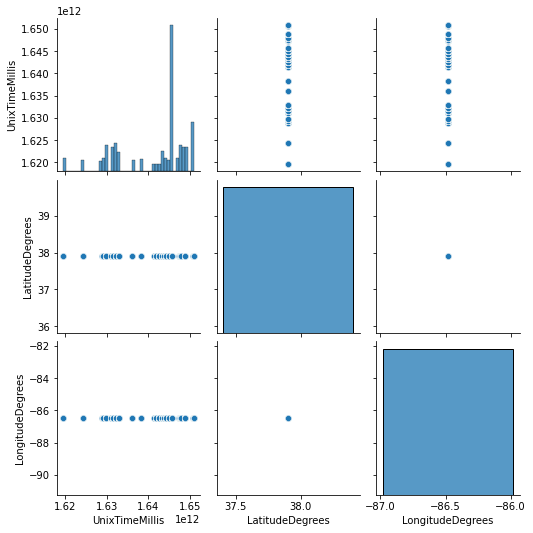

In [12]:
sns.pairplot(df)

<AxesSubplot:xlabel='LatitudeDegrees', ylabel='count'>

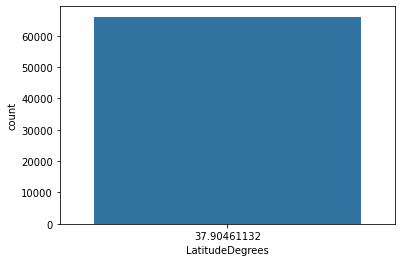

In [13]:
sns.countplot(x=df['LatitudeDegrees'])

In [14]:
pivot = df.pivot_table(index=['LatitudeDegrees'], values=['UnixTimeMillis'], aggfunc='sum')

print (pivot)

                 UnixTimeMillis
LatitudeDegrees                
37.904611          1.084918e+17


In [15]:
pivot = df.pivot_table(index=['LongitudeDegrees'], values=['UnixTimeMillis'], aggfunc='sum')

print (pivot)

                  UnixTimeMillis
LongitudeDegrees                
-86.481078          1.084918e+17


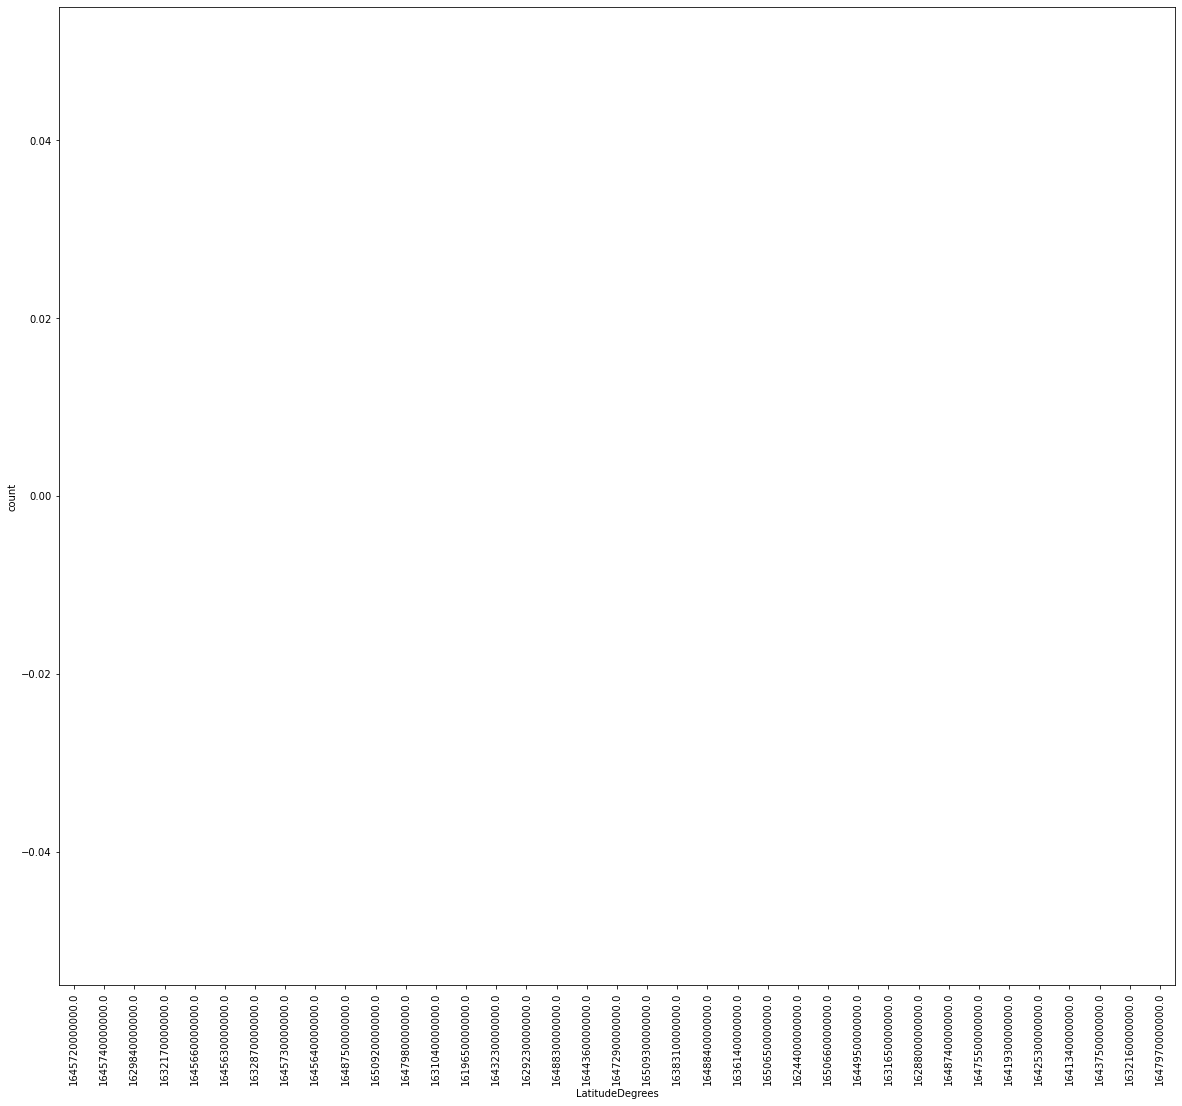

In [17]:
plt.figure(figsize=(20,18))
sns.countplot(x='LatitudeDegrees',data=df ,order=df['UnixTimeMillis'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

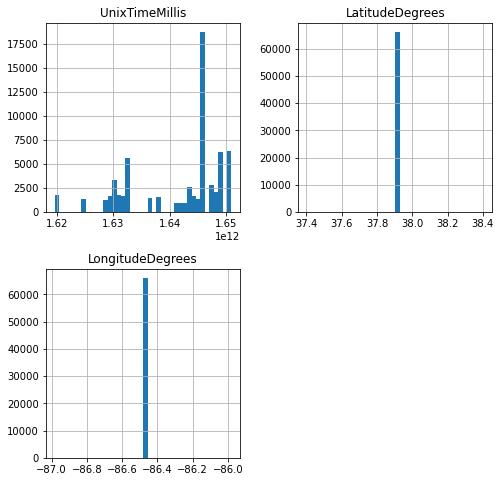

In [18]:
df.hist(figsize=(8,8),bins=40)
plt.show()

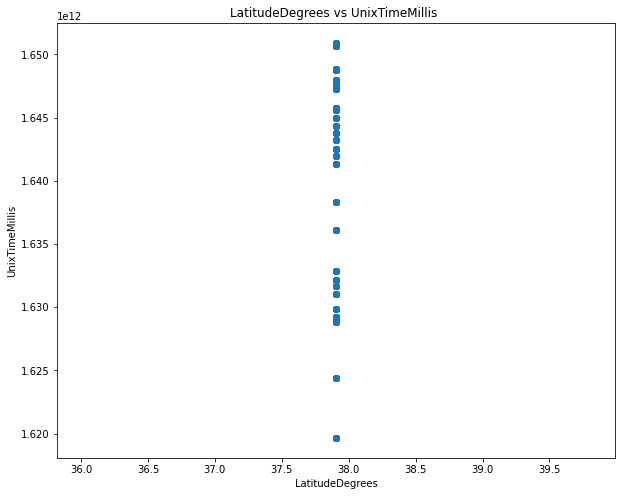

In [19]:
fig,ax=plt.subplots(figsize=(10,8))
ax.scatter(df['LatitudeDegrees'],df['UnixTimeMillis'])
ax.set_xlabel('LatitudeDegrees')
ax.set_ylabel('UnixTimeMillis')
ax.set_title('LatitudeDegrees vs UnixTimeMillis ')
plt.show()

The relation is same

No handles with labels found to put in legend.


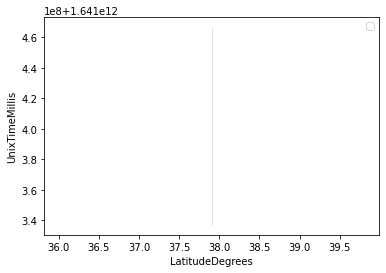

In [20]:
sns.lineplot(x='LatitudeDegrees',y='UnixTimeMillis',data=df)
plt.legend()
plt.show()

<AxesSubplot:xlabel='UnixTimeMillis'>

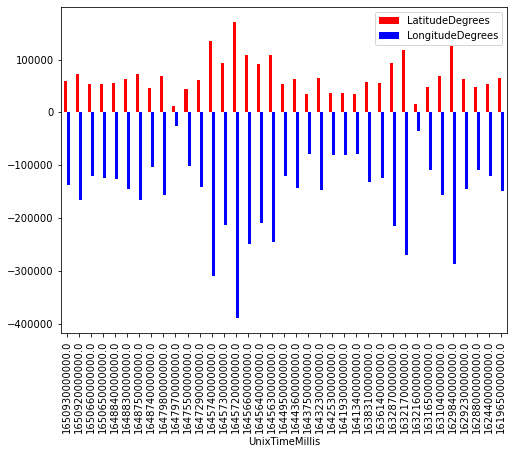

In [21]:
raf=df.groupby('UnixTimeMillis')[['LatitudeDegrees','LongitudeDegrees']].sum().sort_values(by='UnixTimeMillis',ascending=False)
raf[:].plot.bar(color=['red','blue'],figsize=(8,6))

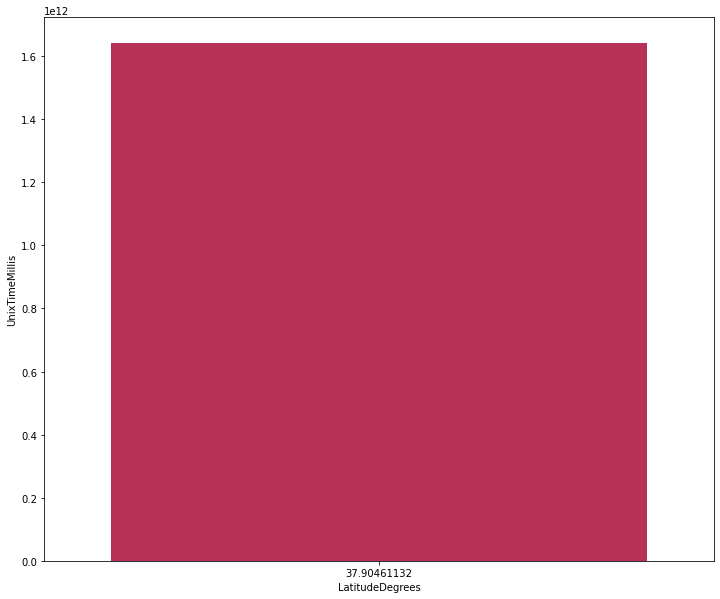

In [23]:
plt.figure(figsize=(12,10))

sns.barplot(x='LatitudeDegrees',y='UnixTimeMillis',data=df,order=df['LatitudeDegrees'].value_counts().index,palette='rocket')

plt.show()